In [2]:
import pandas as pd #reading dataset
import matplotlib as mpl    #plotting, visualization
import matplotlib.pyplot as plt
import tensorflow as tf #building model
from tensorflow.keras.models import Model
import numpy as np  #playing output with model
from sklearn.model_selection import train_test_split    #model selection and scaling data
from sklearn.preprocessing import MinMaxScaler, StandardScaler



In [3]:
df = pd.read_csv('processed_segments_no_overlap.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,curb_scene,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,Acc-Z_8,Acc-Z_9,...,Acc-Z_91,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100
0,0.0,8.762772,8.753204,8.762772,8.781937,8.753204,8.748413,8.738831,8.748413,8.743622,...,8.786728,8.801086,8.820236,8.786728,8.777145,8.772354,8.781937,8.801086,8.781937,8.753204
1,0.0,8.781937,8.796295,8.772354,8.772354,8.772354,8.786728,8.781937,8.801086,8.767563,...,8.777145,8.753204,8.767563,8.762772,8.762772,8.753204,8.748413,8.762772,8.772354,8.767563
2,0.0,8.757996,8.762772,8.777145,8.767563,8.786728,8.777145,8.753204,8.757996,8.777145,...,8.757996,8.757996,8.772354,8.767563,8.757996,8.743622,8.777145,8.743622,8.786728,8.796295
3,0.0,8.757996,8.786728,8.791504,8.781937,8.772354,8.762772,8.781937,8.762772,8.767563,...,8.743622,8.762772,8.767563,8.757996,8.762772,8.781937,8.772354,8.767563,8.767563,8.801086
4,0.0,8.772354,8.762772,8.786728,8.767563,8.753204,8.762772,8.757996,8.757996,8.762772,...,8.777145,8.748413,8.791504,8.748413,8.767563,8.772354,8.772354,8.777145,8.767563,8.781937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5486,1.0,1.781281,7.517792,7.517792,11.506531,18.310852,14.408310,5.880158,9.155426,6.181824,...,-9.974243,-4.079727,12.971787,35.094208,35.094208,29.678528,12.061981,3.869034,0.282516,1.613693
5487,1.0,6.866577,11.966217,13.469772,7.694961,4.419693,15.255859,23.113617,12.947845,12.947845,...,9.155426,15.145721,13.752289,1.455673,6.268021,19.474442,17.611755,17.611755,12.421112,3.189072
5488,1.0,-2.624039,-2.992752,12.392395,14.432251,24.406494,22.993912,10.745178,-1.216248,-4.831497,...,12.014099,10.970230,3.050217,9.270355,9.270355,16.275787,6.411667,6.411667,8.188171,5.961563
5489,1.0,0.009583,9.605545,12.990936,20.561401,15.883133,11.774689,13.302185,10.544067,17.769760,...,60.429657,60.429657,25.072083,9.495407,9.495407,-14.068329,-19.512741,-11.065994,2.049438,10.376465


In [4]:
# 0 for normal, 1 for abnormal
df['curb_scene'].value_counts()

curb_scene
0.0    5304
1.0     187
Name: count, dtype: int64

In [5]:
#spilt data using sklearn, train data with label now to spilt later
train_data, test_data, train_labels, test_labels = train_test_split(df, df['curb_scene'], test_size=0.2, random_state=111)
train_data

,curb_scene,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,Acc-Z_8,Acc-Z_9,...,Acc-Z_91,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100
2861,0.0,14.580688,8.781937,-0.292099,2.461243,12.358871,16.079453,9.318237,5.803543,1.489197,...,11.985367,7.694961,10.362106,6.584061,10.630249,10.266342,10.323792,10.070007,5.391739,7.311890
4606,0.0,8.504211,7.331039,13.953415,9.361328,14.777008,5.497086,5.856216,6.076477,7.067688,...,10.558426,6.564896,0.679947,11.334152,13.292603,12.598297,1.134857,-5.061340,4.884170,12.306198
4140,0.0,18.986023,14.341263,5.564117,11.540054,7.034164,6.952759,9.667786,11.942276,9.816223,...,7.651871,9.816223,12.818558,13.187256,8.705322,7.158661,9.682159,12.469009,11.635818,8.355759
776,0.0,6.598419,8.599976,15.897507,10.362106,1.810013,-2.877838,2.221817,14.384369,16.122559,...,8.178589,17.654846,10.668564,11.654968,3.112457,5.252884,7.201752,6.507446,8.489838,6.133942
2316,0.0,8.829819,8.729263,8.633499,8.671799,8.762772,8.753204,8.614334,8.532928,8.595184,...,8.844177,8.695740,8.590393,8.638275,8.858551,8.729263,8.772354,8.719681,8.714890,8.844177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,0.0,5.861008,5.003876,8.892059,11.200073,7.881714,5.123596,5.161896,10.180145,12.152969,...,8.681381,6.148315,9.078812,7.762009,9.940720,10.280701,8.777145,8.796295,8.245636,11.554413
4182,0.0,12.411545,4.199432,3.821152,3.327942,11.961426,10.749970,8.528152,1.010361,9.749191,...,7.010223,6.172256,15.701172,14.772232,9.667786,2.427719,4.979935,11.645401,13.747513,5.578491
4820,0.0,11.650192,13.335709,10.510544,9.342178,7.115570,9.572021,9.888046,6.794739,3.385407,...,9.385269,23.008286,20.968414,9.509766,4.764465,6.229706,20.034683,17.099396,9.260773,-1.604111
2004,0.0,11.219223,8.542511,5.449204,9.236832,12.440277,16.601395,15.073898,16.294937,10.170563,...,8.762772,8.413223,9.093185,3.988739,3.102890,9.485825,13.354858,11.425125,10.189728,5.195419


In [ ]:
#scaling data, becasue neural network works better with scaled data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(train_data.iloc[:, 1:])
#transform data
train_data_scaled = scaler.transform(train_data.iloc[:, 1:])
test_data_scaled = scaler.transform(test_data.iloc[:, 1:])
print(train_data_scaled.shape)
# Convert the scaled data back to DataFrames for further processing
train_data_scaled_df = pd.DataFrame(train_data_scaled, columns=train_data.columns[1:])
test_data_scaled_df = pd.DataFrame(test_data_scaled, columns=test_data.columns[1:])
# Add the 'curb_scene' column back to the scaled DataFrames
train_data_scaled_df['curb_scene'] = train_data['curb_scene'].values
test_data_scaled_df['curb_scene'] = test_data['curb_scene'].values

(4392, 100)
    Acc-Z_1   Acc-Z_2   Acc-Z_3   Acc-Z_4   Acc-Z_5   Acc-Z_6   Acc-Z_7  \
0  1.005067 -0.020062 -1.691112 -1.157880  0.575593  1.240395  0.082665   
1 -0.065201 -0.270559  0.950900  0.071775  0.984710 -0.607467 -0.516486   
2  1.780992  0.939757 -0.605002  0.460043 -0.325275 -0.353282  0.143160   
3 -0.400874 -0.051477  1.311457  0.250123 -1.209131 -2.069871 -1.145470   
4 -0.007851 -0.029156 -0.035746 -0.051105 -0.032818 -0.038893 -0.039155   

    Acc-Z_8   Acc-Z_9  Acc-Z_10  ...  Acc-Z_92  Acc-Z_93  Acc-Z_94  Acc-Z_95  \
0 -0.470801 -1.236888  1.006146  ... -0.219926  0.298767 -0.469667  0.297378   
1 -0.427465 -0.293210 -0.358657  ... -0.434960 -1.614621  0.456717  0.790380   
2  0.503892  0.171742  1.576882  ...  0.183716  0.784211  0.818118 -0.059071   
3  0.891641  1.238544 -0.072463  ...  1.675282  0.359329  0.519284 -1.094732   
4 -0.037436 -0.034814 -0.041858  ... -0.029494 -0.051359 -0.069045 -0.030697   

   Acc-Z_96  Acc-Z_97  Acc-Z_98  Acc-Z_99  Acc-Z_100  cu

In [7]:
# Filter and slice the data
normal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 0.0].values[:, :-1]
abnormal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 1.0].values[:, :-1]
normal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 0.0].values[:, :-1]
abnormal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 1.0].values[:, :-1]
# Debug: Print the shapes to verify the slicing
print("Normal Train Data Shape:", normal_train_data_scaled.shape)
print("Abnormal Train Data Shape:", abnormal_train_data_scaled.shape)
print("Normal Test Data Shape:", normal_test_data_scaled.shape)
print("Abnormal Test Data Shape:", abnormal_test_data_scaled.shape)

Normal Train Data Shape: (4246, 100)
Abnormal Train Data Shape: (146, 100)
Normal Test Data Shape: (1058, 100)
Abnormal Test Data Shape: (41, 100)


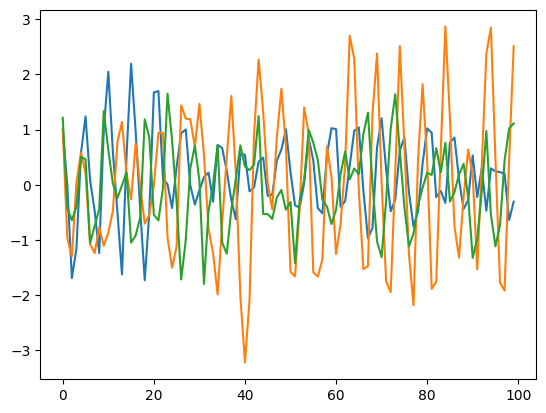

In [8]:
#See normal data ecg
plt.plot(normal_train_data_scaled[0])
plt.plot(normal_train_data_scaled[10])
plt.plot(normal_train_data_scaled[20])

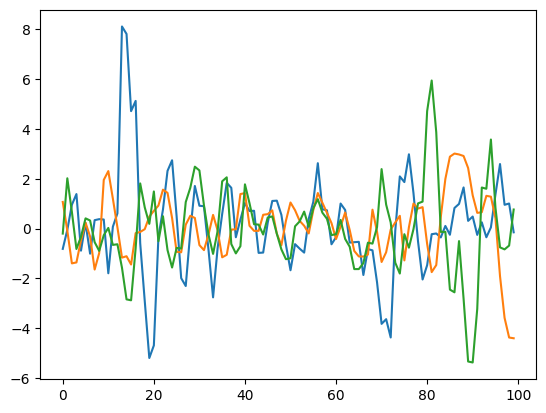

In [9]:
#see abnormal data ecg
plt.plot(abnormal_train_data_scaled[20])
plt.plot(abnormal_train_data_scaled[30])
plt.plot(abnormal_train_data_scaled[100])


In [10]:
#Allow me to use data in different ways
class AutoEncoder(Model):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dense(8, activation='relu')
        ])
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(100, activation='sigmoid')
        ])
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        #returns me a decoder object
        return decoded

In [11]:
#define model
model = AutoEncoder()
#if in 2 Epochs, loss is not decreasing, stop the training
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode='min')
model.compile(optimizer='adam', loss='mae')

In [12]:
# seprate class as well for normal and abnormal data invalidation data
history = model.fit(normal_train_data_scaled, normal_train_data_scaled,epochs=100, batch_size=128,
                    validation_data=(train_data_scaled, train_data_scaled), 
                    shuffle=True, callbacks=[early_stopping])

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.7099 - val_loss: 0.6268
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5251 - val_loss: 0.5414
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4757 - val_loss: 0.5413
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4830 - val_loss: 0.5413
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4856 - val_loss: 0.5413
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4887 - val_loss: 0.5413
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4798 - val_loss: 0.5412
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4859 - val_loss: 0.5411
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4795 - val_loss: 0.5407
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4788 - val_loss: 0.5400
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4745 - val_loss: 0.5394
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

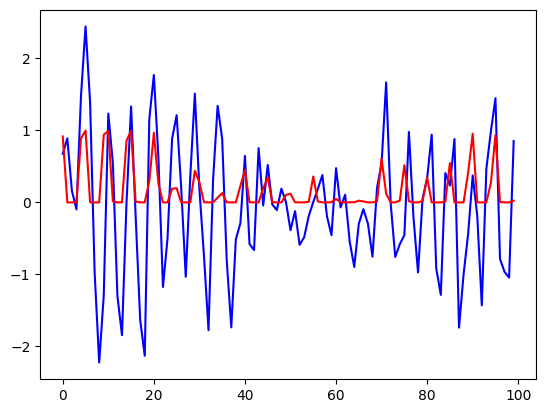

In [13]:
#normal data
#Encoder is bottleneck of 8 Units, decoder is reconstructed output of 100 units
encoder_out = model.encoder(normal_test_data_scaled).numpy()
decoder_out = model.decoder(encoder_out).numpy()
plt.plot(normal_test_data_scaled[0], 'blue')
plt.plot(decoder_out[0], 'red')

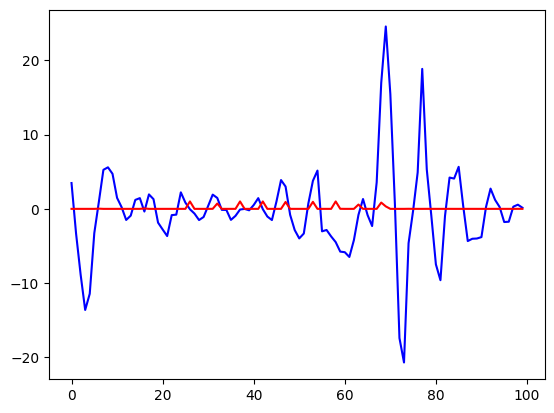

In [14]:
# abnormal data
encoder_out_abnormal = model.encoder(abnormal_test_data_scaled).numpy()
decoder_out_abnormal = model.decoder(encoder_out_abnormal).numpy()
plt.plot(abnormal_test_data_scaled[2], 'blue')
plt.plot(decoder_out_abnormal[2], 'red')

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


(array([ 93., 220.,  15.,   8.,   6.,   1.,   3.,   1.,   4.,  12.,  24.,
         24.,  40.,  35.,  55.,  40.,  37.,  40.,  47.,  46.,  49.,  38.,
         41.,  30.,  29.,  18.,  17.,  19.,  12.,   8.,   7.,   9.,   4.,
          2.,   3.,   2.,   2.,   2.,   0.,   4.,   2.,   5.,   1.,   1.,
          0.,   0.,   1.,   0.,   0.,   1.]),
 array([0.01776952, 0.04881921, 0.07986889, 0.11091857, 0.14196826,
        0.17301794, 0.20406762, 0.23511731, 0.26616699, 0.29721667,
        0.32826636, 0.35931604, 0.39036572, 0.42141541, 0.45246509,
        0.48351477, 0.51456446, 0.54561414, 0.57666382, 0.60771351,
        0.63876319, 0.66981287, 0.70086256, 0.73191224, 0.76296192,
        0.79401161, 0.82506129, 0.85611097, 0.88716066, 0.91821034,
        0.94926002, 0.98030971, 1.01135939, 1.04240907, 1.07345876,
        1.10450844, 1.13555812, 1.16660781, 1.19765749, 1.22870717,
        1.25975686, 1.29080654, 1.32185622, 1.35290591, 1.38395559,
        1.41500527, 1.44605496, 1.47710464, 1.

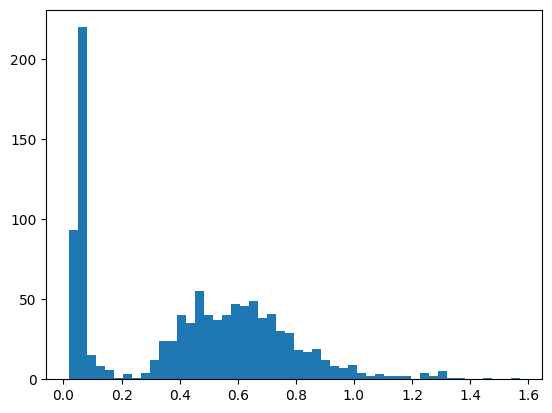

In [15]:
reconstruction = model.predict(normal_test_data_scaled)    #output error between input and output
train_loss = tf.keras.losses.mae(reconstruction, normal_test_data_scaled)
plt.hist(train_loss, bins=50)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


(array([1., 1., 1., 1., 1., 1., 2., 0., 2., 0., 1., 0., 1., 0., 1., 0., 2.,
        2., 3., 2., 2., 2., 1., 1., 3., 1., 1., 0., 0., 0., 1., 3., 0., 2.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([1.02821577, 1.11112532, 1.19403487, 1.27694442, 1.35985398,
        1.44276353, 1.52567308, 1.60858264, 1.69149219, 1.77440174,
        1.85731129, 1.94022085, 2.0231304 , 2.10603995, 2.1889495 ,
        2.27185906, 2.35476861, 2.43767816, 2.52058771, 2.60349727,
        2.68640682, 2.76931637, 2.85222592, 2.93513548, 3.01804503,
        3.10095458, 3.18386413, 3.26677369, 3.34968324, 3.43259279,
        3.51550234, 3.5984119 , 3.68132145, 3.764231  , 3.84714055,
        3.93005011, 4.01295966, 4.09586921, 4.17877876, 4.26168832,
        4.34459787, 4.42750742, 4.51041697, 4.59332653, 4.67623608,
        4.75914563, 4.84205518, 4.92496474, 5.00787429, 5.09078384,
        5.17369339]),
 <BarContainer object of 50 artists>)

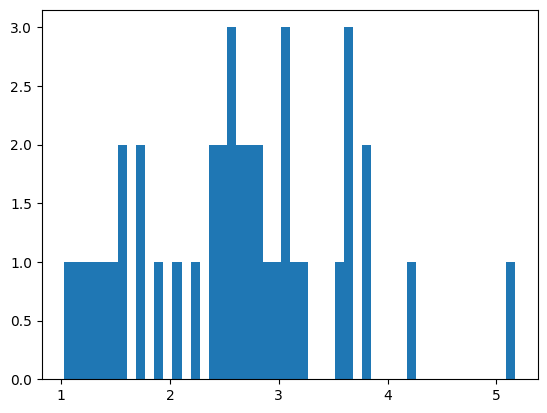

In [23]:
reconstruction_abnormal = model.predict(abnormal_test_data_scaled)
train_loss_abnormal = tf.keras.losses.mae(reconstruction_abnormal, abnormal_test_data_scaled)
plt.hist(train_loss_abnormal, bins=50)

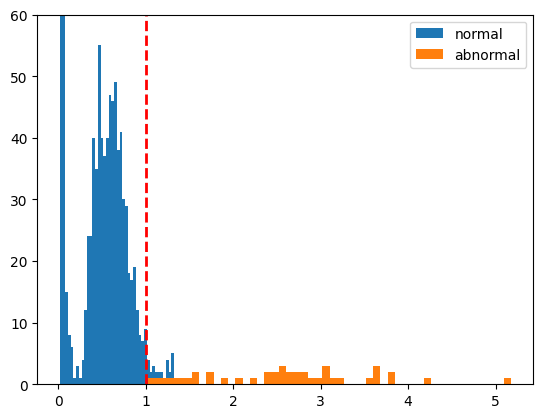

In [24]:
threadshold = 1
plt.hist(train_loss, bins=50, label='normal')
plt.hist(train_loss_abnormal, bins=50, label='abnormal')
plt.ylim(0, 60)
plt.legend()
plt.axvline(threadshold, color='r', linestyle='dashed', linewidth=2,label = '{:0.3f}'.format(threadshold))
plt.show()

In [22]:
preds=tf.math.less(train_loss, threadshold)
correct = tf.math.count_nonzero(preds)
print("Correct Predictions: ", correct.numpy())
print("Accuracy: ", correct.numpy()/len(preds))

Correct Predictions:  1024
Accuracy:  0.9678638941398866


In [27]:
preds_abnormal=tf.math.greater(train_loss_abnormal, threadshold)
correct = tf.math.count_nonzero(preds_abnormal)
print("Correct Predictions: ", correct.numpy())
print("Accuracy: ", correct.numpy()/len(preds_abnormal))

Correct Predictions:  41
Accuracy:  1.0
